In [ ]:
!apt-get update #update linux
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #download and install openjdk
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz #download spark binary (gunzip)
!tar xf spark-3.2.1-bin-hadoop2.7.tgz #extract the spark package
!pip install -q findspark #install the findspark package

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,734 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archi

In [ ]:
#set environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
!ls #check directory

sample_data  spark-3.2.1-bin-hadoop2.7	spark-3.2.1-bin-hadoop2.7.tgz


In [ ]:
!ls sample_data #check directory under sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
# import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 

# File location and type
path = 'sample_data/california_housing_train.csv'
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Import csv. The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(path)

df.head() #first row object

Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0)

In [ ]:
type(df.head())

pyspark.sql.types.Row

In [ ]:
df.take(5) #first 5 row objects

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

In [ ]:
type(df.take(5))

list

In [ ]:
df.limit(5).collect()

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

In [ ]:
df

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double]

In [ ]:
df.show(12) #show 12 rows in table format

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [ ]:
display(df) #doesn't really do much here -- 'display' can be used in Databricks

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double]

In [ ]:
df.describe() #doesn't really do much here

DataFrame[summary: string, longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]

In [ ]:
df.describe().show() #get a quick summary of the data frame

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [ ]:
df.select('population').show(5) #select one column

+----------+
|population|
+----------+
|    1015.0|
|    1129.0|
|     333.0|
|     515.0|
|     624.0|
+----------+
only showing top 5 rows



In [ ]:
df.select('population','households').show(5) #select multiple columns

+----------+----------+
|population|households|
+----------+----------+
|    1015.0|     472.0|
|    1129.0|     463.0|
|     333.0|     117.0|
|     515.0|     226.0|
|     624.0|     262.0|
+----------+----------+
only showing top 5 rows



In [ ]:
df.filter(df.population > 10000).show() #filter by population  >= 10000

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.12|   33.52|               4.0|    30401.0|        4957.0|   13251.0|    4339.0|       4.5841|          212300.0|
|  -117.42|   33.35|              14.0|    25135.0|        4819.0|   35682.0|    4769.0|       2.5729|          134400.0|
|  -117.61|    34.1|               9.0|    18956.0|        4095.0|   10323.0|    3832.0|       3.6033|          132600.0|
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.75|   34.01|               4.0|    22128.0|        3522.0|   10450.0|    3258.0|       6.1287|          289600.0|
|  -117.78|   34.03|    

In [ ]:
df.filter((df.population > 10000) & (df.households>=5000)).show() #filter by multiple conditions

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
#Using SQL Expression to filter by multiple conditions
df.filter("population > 10000 and households>=5000").show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
#display a histogram
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_pd= df.toPandas() # convert to pandas dataframe


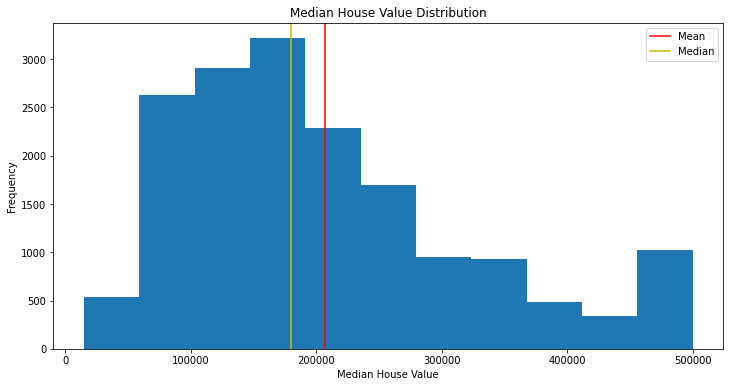

In [ ]:
fig = plt.figure(figsize = (12, 6))
plt.hist(df_pd["median_house_value"], bins = 11, range = (14999, 500001))
plt.title("Median House Value Distribution")
plt.ylabel("Frequency")
plt.xlabel("Median House Value")
plt.axvline(x = np.mean(df_pd["median_house_value"]), color = 'r', label = 'Mean')
plt.axvline(x = np.median(df_pd["median_house_value"]), color = 'y', label = 'Median')
plt.legend()

([], <a list of 0 Text major ticklabel objects>)

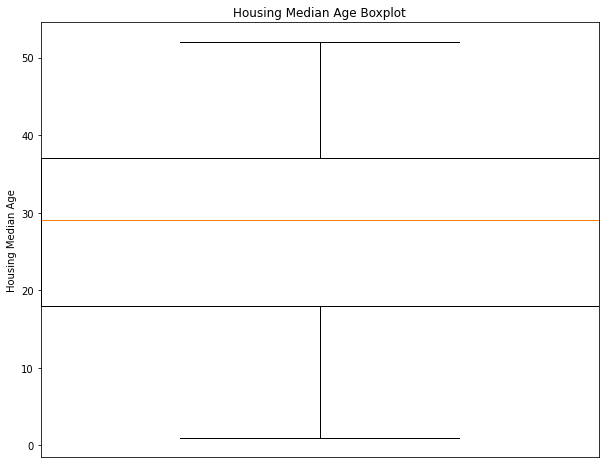

In [ ]:
#display a box plot
fig2 = plt.figure(figsize = (10, 8))
plt.boxplot(df_pd["housing_median_age"], widths = 1)
plt.title("Housing Median Age Boxplot")
plt.ylabel("Housing Median Age")
plt.xticks([])

In [ ]:
# data frame type
print(type(df))
print(type(df_pd))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# take approximately 10% random sample
sample_df = df.sample(withReplacement=False, fraction=0.1)
sample_df.count()

1608

In [ ]:
sample_df.show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.61|   34.84|              48.0|     1291.0|         248.0|     580.0|     211.0|       2.1571|           48600.0|
|   -115.4|   32.86|              19.0|     1087.0|         171.0|     649.0|     173.0|       3.3182|          113800.0|
|  -115.55|   32.79|              22.0|      565.0|         162.0|     692.0|     141.0|       1.2083|           53600.0|
|  -115.56|   32.96|              21.0|     2164.0|         480.0|    1164.0|     421.0|       3.8177|          107200.0|
|  -115.56|   32.79|    

In [ ]:
sample_df.describe().show() #get a quick summary of the data frame

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|         longitude|          latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|        households|     median_income|median_house_value|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              1608|              1608|              1608|              1608|              1608|              1608|              1608|              1608|              1608|
|   mean|-119.6031654228858|35.630547263681585|28.779850746268657|2667.9490049751244| 544.9521144278607|1420.0366915422885|504.50248756218906|3.9333211442786022| 211746.3196517413|
| stddev| 2.011367166080719|2.1408015292314007|12.744438057793989|2287.2630279856426|437.361732

In [ ]:
df.describe().show() #get a quick summary of the data frame

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [ ]:
# Write spark DataFrame data to CSV file
df.write.csv("california_housing_train_output.csv")

In [ ]:
# Write spark DataFrame data to json file
df.write.json("california_housing_train_output.json")